README

The only depedencies that are required are the following libraries: NumPy and Matplotlib.

The notebook needs the following files to run: X_train.csv, Y_train.csv, X_test.csv, and Y_test.csv.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class MLP_One_Hidden_Layer:
  def __init__(self, nodes_hidden_layer, activation_function, data_matrix, learning_rate):
    self.nodes_hidden_layer = nodes_hidden_layer
    self.activation_function = activation_function
    self.data_matrix = data_matrix
    self.num_examples = np.shape(data_matrix)[0]
    self.w1_matrix = np.random.rand(self.nodes_hidden_layer, np.shape(self.data_matrix)[1] - 1)
    self.w2_matrix = np.random.rand(1, self.nodes_hidden_layer)
    self.a1_matrix = np.zeros((self.num_examples, self.nodes_hidden_layer))
    self.a2_matrix = np.zeros((self.num_examples, 1))
    self.learning_rate = learning_rate
    self.residuals_vector = np.zeros((1, self.num_examples))
    self.gradient_a1_z1 = np.zeros((self.num_examples, self.nodes_hidden_layer))
    self.gradient_loss_a2 = np.zeros((1, self.num_examples))

  # Returns Mean Squared Error
  def MSE(self):
    return np.sum(np.power(self.residuals_vector, 2)) / self.num_examples

  # Returns R2 accuracy score
  def R2_score(self):

    average_labels = np.sum(self.data_matrix[:, -1]) / self.num_examples
    TSS = np.sum(np.power((self.data_matrix[:, -1] - average_labels), 2))
    SSR = np.sum(np.power(self.residuals_vector, 2))

    return 1 - (SSR/TSS)

  # Sigmoid Activation Function
  def sigmoid_activation(self, z):
    return 1 / (1 + np.exp(-z))

  # Tanh Activation Function
  def tanh_activation(self, z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

  # Linear Activation Function
  def linear_activation(self, z):
    return z

  # Calculates z1 and a1
  def find_a1(self):
    z1 = np.dot(self.data_matrix[:, :-1], self.w1_matrix.T)

    # Activation Function Call
    if self.activation_function == "sigmoid":
      self.a1_matrix = self.sigmoid_activation(z1)
    elif self.activation_function == "tanh":
      self.a1_matrix = self.tanh_activation(z1)
    else:
      self.a1_matrix = z1

  # Finds gradient of a1 with respect to z1
  def find_gradient_a1_z1(self):
    # Finding the gradient of the activation function with respect to z1
    if self.activation_function == "sigmoid":
      self.gradient_a1_z1 = np.multiply(self.a1_matrix, (1 - self.a1_matrix))
    elif self.activation_function == "tanh":
      self.gradient_a1_z1 = 1 - np.power(self.a1_matrix, 2)
    else:
      self.gradient_a1_z1 = 1

  # Calculates z2 and a2
  def find_a2(self):
    z2 = np.dot(self.a1_matrix, self.w2_matrix.T)
    self.a2_matrix = self.linear_activation(z2)

  # Updates w1 weights
  def update_w1(self):

    # Finding the gradient of the activation function of the hidden layer with respect to z1
    self.find_gradient_a1_z1()

    # Chain rule to find the gradient of the loss function with respect to w1
    A = np.dot(self.gradient_loss_a2.T, self.w2_matrix)
    B = np.multiply(A, self.gradient_a1_z1)
    C = np.dot(B.T, self.data_matrix[:, :-1])

    update = C * self.learning_rate

    self.w1_matrix -= update

  # Updates w2 weights
  def update_w2(self):

    # Calculate gradient of loss with respect to a2
    self.gradient_loss_a2 = (-2 / self.num_examples) * (self.residuals_vector)

    # Chain rule to find the gradient of the loss function with respect to w2
    # Gradient of the output activation function with respect to z2 is 1 because the activation function is linear
    A = np.dot(self.gradient_loss_a2, self.a1_matrix)

    update = A * self.learning_rate

    self.w2_matrix -= update

  # Feed forward function to find a2 in testing
  def feed_forward(self):

      # Feed Forward
      self.find_a1()
      self.find_a2()

      # Find Residuals
      self.residuals_vector = self.data_matrix[:, -1] - self.a2_matrix.T

  # Training function
  def MLP_training(self, epochs):

    loss_across_epochs = np.zeros(epochs)
    accuracy_across_epochs = np.zeros(epochs)

    for i in range(epochs):

      # Shuffle data for each epoch
      np.random.shuffle(self.data_matrix)

      # Feed Forward
      self.find_a1()
      self.find_a2()

      # Find Residuals
      self.residuals_vector = self.data_matrix[:, -1] - self.a2_matrix.T

      # Update Weight Matrices
      # Back Propagation
      self.update_w2()
      self.update_w1()

      # Update loss across epochs vector
      loss_across_epochs[i] = self.MSE()

      # Update accuracy across epochs vector
      accuracy_across_epochs[i] = self.R2_score()

    return loss_across_epochs, accuracy_across_epochs


**Question 1**

For a network trained for regression using Mean Square Error and a network trained for binary classification using Log Loss, you need to find the gradient of the loss with respect to the weights and you need to multiply this gradient by the learning rate and then subtract this from our current weights to update our parameters. We are comparing two models each with only one input layer, one hidden layer, and one output layer. Both models have a sigmoid activation function for the hidden layer, however our MLP that uses Mean Square Error as its loss function has an indentity activation function as its output layer. The MLP used for binary classification, on the other hand, has a sigmoid activation function in its output layer. The gradient of the loss function with respect to w2(the weights connecting to the output layer) for the Regression MLP is (-2/N * (y - a2))T * 1 * a1. The gradient of da2/dz2 is 1 as the identity function in this case is f(z2) = z2. So the update rule in this case to update our w2 weights is w2 = w2 - (learning rate * (-2/N * (y - a2) * 1 * a1)). The update rule for our w2 weights for our binary classification MLP is w2 = w2 - (learning rate * ((a2-y) * a1).

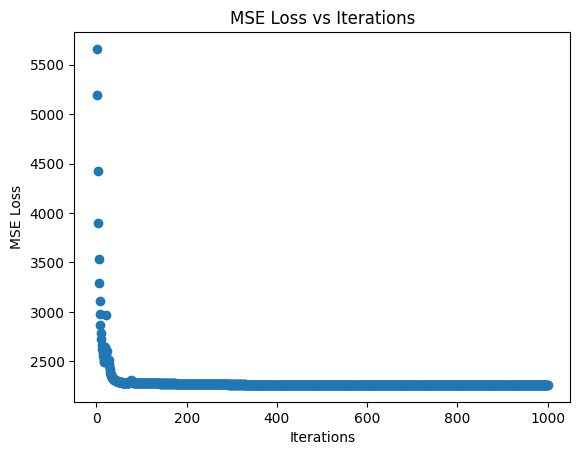

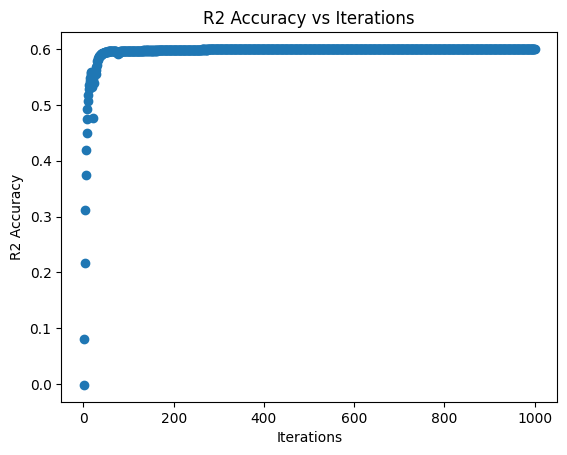

MSE for training
2260.8552817712234
R2 accuracy for training
0.600005663908767
MSE for testing
2470.7003056324324
R2 accuracy for testing
0.5508117673844812


In [12]:
# Initial Training and Testing

# Read in training data
x_train = np.loadtxt("X_train.csv")
y_train = np.loadtxt("Y_train.csv")

# Create training data matrix
training_data_matrix = np.ones((np.shape(x_train)[0], np.shape(x_train)[1] + 2))
training_data_matrix[:, :-2] = x_train
training_data_matrix[:, -2] = 1
training_data_matrix[:, -1] = y_train

# Read in testing data
x_test = np.loadtxt("X_test.csv")
y_test = np.loadtxt("Y_test.csv")

# Create testing data matrix
testing_data_matrix = np.ones((np.shape(x_test)[0], np.shape(x_test)[1] + 2))
testing_data_matrix[:, :-2] = x_test
testing_data_matrix[:, -2] = 1
testing_data_matrix[:, -1] = y_test

# Training

# Instantiate MLP Model for Regression Task
MLP = MLP_One_Hidden_Layer(nodes_hidden_layer=5, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.05)

# Train model
loss_across_epochs, accuracy_across_epochs = MLP.MLP_training(1000)

# Plot loss across epochs
plt.figure()
plt.title("MSE Loss vs Iterations")
plt.scatter(np.arange(1, 1001), loss_across_epochs)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")

# Plot accuracy across epochs
plt.figure()
plt.title("R2 Accuracy vs Iterations")
plt.scatter(np.arange(1, 1001), accuracy_across_epochs)
plt.xlabel("Iterations")
plt.ylabel("R2 Accuracy")

plt.show()

# Print MSE for Training
print("MSE for training")
print(MLP.MSE())
print("R2 accuracy for training")
print(MLP.R2_score())

# Testing

# Modifying data matrix field in our MLP model to our new testing data matrix
# Modifying number of examples field in the model as well
MLP.data_matrix = testing_data_matrix
MLP.num_examples = np.shape(testing_data_matrix)[0]

# Run testing
MLP.feed_forward()

# Plot loss across epochs

# Print MSE for Testing
print("MSE for testing")
print(MLP.MSE())
print("R2 accuracy for testing")
print(MLP.R2_score())


**Question 2**

1. The activation function I will choose for my output layer is the linear(identity) activation function because my labels for my training data is continous ranging from -147 to 160. Because my range is a lot larger than -1 to 1 that eliminates both tanh and sigmoid. Also cause I have negative values that eliminates RELU.

2. The amount of neurons that should be in my output layer is 1 because I am dealing with a regression model and I only need one value as my output. If I was building a multi-class classification model than I would need more than one node in my output layer.

3. My MSE loss and R2 accuracy for training is approximately 2260 and .6 respectively. My MSE loss and R2 accuracy for testing is appoximately 2470 and 0.55 respectively.

4. See plot above for the MSE and accuracy as a function of the number of iterations for training.

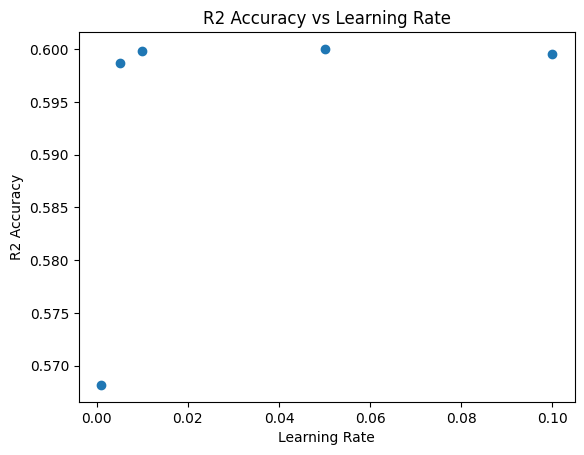

Accuracy across learning rates
[0.56818614 0.59868715 0.59981392 0.60001345 0.59955795]


In [13]:
# Effect of learning rate on training process

# Accuracy for different learning rates
# Epochs set to 1000, number of hidden layer neurons set to 5

# Accuracy across learning rates vector
accuracy_across_learning_rates = np.zeros(5)

# Instantiate MLP Model for Regression Task with learning rate .001
MLP = MLP_One_Hidden_Layer(nodes_hidden_layer=5, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.001)
#Training
MLP.MLP_training(1000)
accuracy_across_learning_rates[0] = MLP.R2_score()

# Instantiate MLP Model for Regression Task with learning rate .005
MLP = MLP_One_Hidden_Layer(nodes_hidden_layer=5, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.005)
#Training
MLP.MLP_training(1000)
accuracy_across_learning_rates[1] = MLP.R2_score()

# Instantiate MLP Model for Regression Task with learning rate .01
MLP = MLP_One_Hidden_Layer(nodes_hidden_layer=5, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.01)
#Training
MLP.MLP_training(1000)
accuracy_across_learning_rates[2] = MLP.R2_score()

# Instantiate MLP Model for Regression Task with learning rate .05
MLP = MLP_One_Hidden_Layer(nodes_hidden_layer=5, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.05)
#Training
MLP.MLP_training(1000)
accuracy_across_learning_rates[3] = MLP.R2_score()

# Instantiate MLP Model for Regression Task with learning rate .1
MLP = MLP_One_Hidden_Layer(nodes_hidden_layer=5, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.1)
#Training
MLP.MLP_training(1000)
accuracy_across_learning_rates[4] = MLP.R2_score()

# Plot accuracy across different learning rates
plt.figure()
plt.title("R2 Accuracy vs Learning Rate")
plt.scatter(np.array([.001, .005, .01, .05, .1]), accuracy_across_learning_rates)
plt.xlabel("Learning Rate")
plt.ylabel("R2 Accuracy")
plt.show()

# Print accuracy across learning rates
print("Accuracy across learning rates")
print(accuracy_across_learning_rates)

**Question 2**

5. The learning rate does not have much effect on the training process as the accuracy for the learning rates of .001, .005, .01, .05, and .1 are all around the .55 - .6 range. The model with the .05 learning rate seems to do the best in training. I could not use values over .1 for my learning rate as I would encounter overflow errors.

MSE loss for one neuron in hidden layer - Training
2629.3177745538555
MSE loss for one neuron in hidden layer - Testing
3005.475748065607
MSE loss for three neurons in hidden layer - Training
2272.694760791332
MSE loss for three neurons in hidden layer - Testing
2486.1583315481876
MSE loss for five neurons in hidden layer - Training
2260.9117940848355
MSE loss for five neurons in hidden layer - Testing
2470.740456160455
MSE loss for seven neuron in hidden layer - Training
2260.2791877289847
MSE loss for seven neurons in hidden layer - Testing
2468.8810402956387
MSE loss for ten neurons in hidden layer - Training
2260.2051084219374
MSE loss for ten neurons in hidden layer - Testing
2467.9316722148374


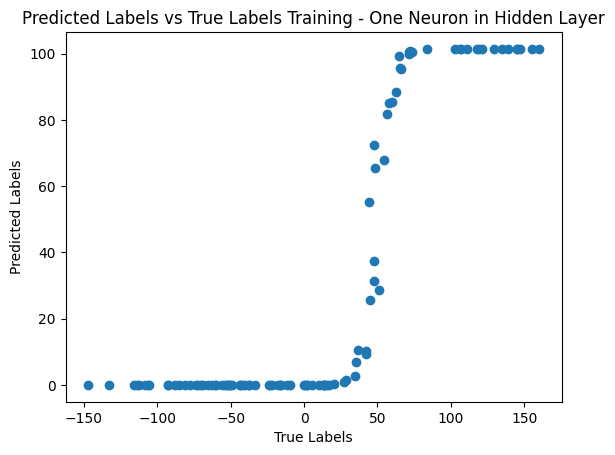

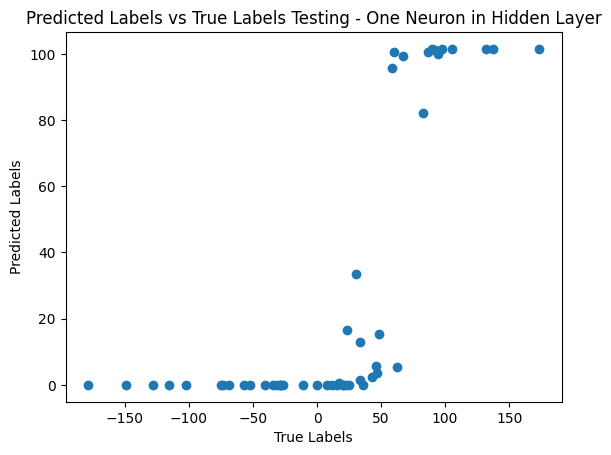

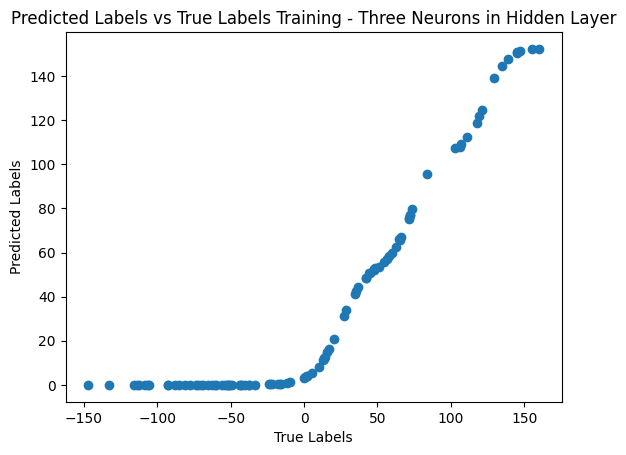

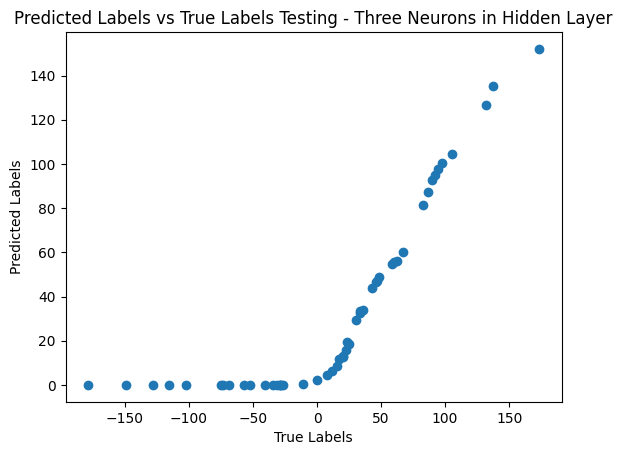

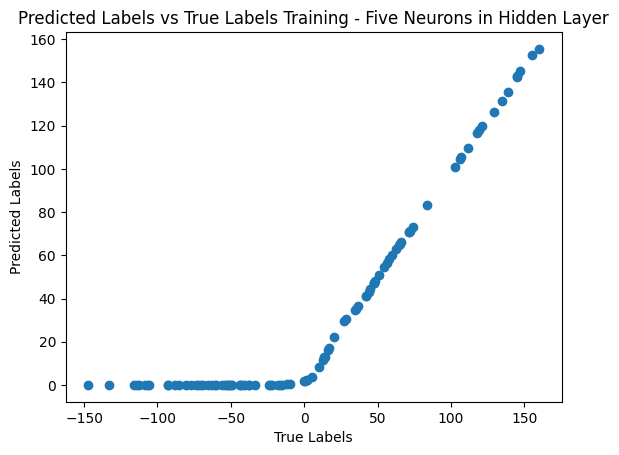

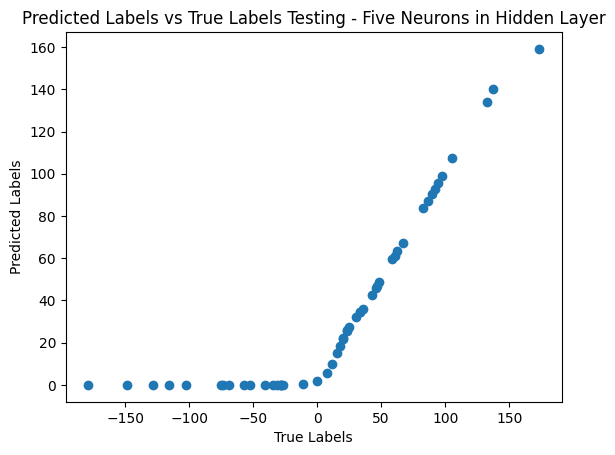

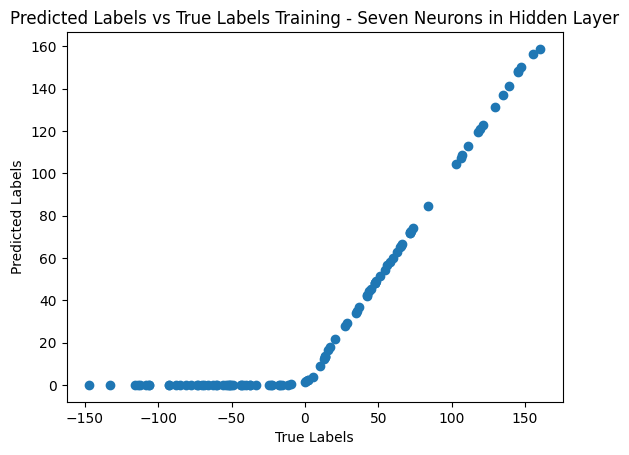

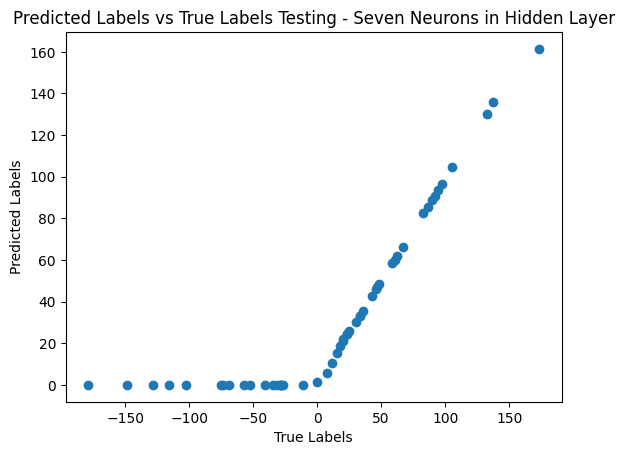

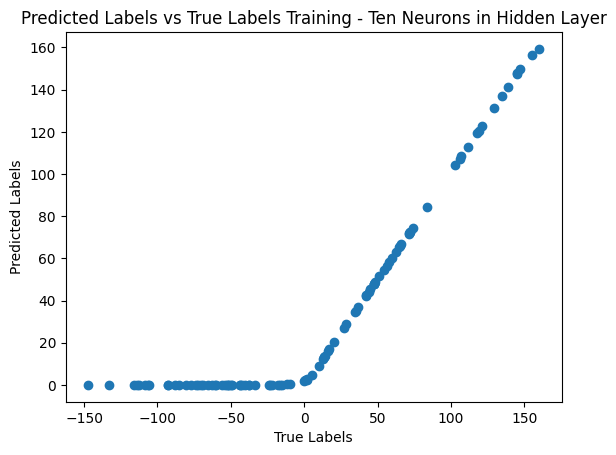

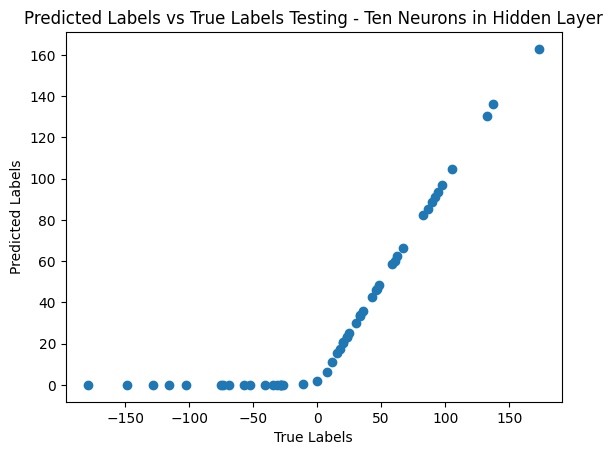

In [19]:
# Effect of different amount of neurons in hidden layer

# Epochs set to 1000, learning rate set to .05

# One neuron in hidden layer
MLP_one = MLP_One_Hidden_Layer(nodes_hidden_layer=1, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.05)
MLP_one.MLP_training(1000)

# Plotting Predicted Labels vs True Labels for Training
plt.figure()
plt.title("Predicted Labels vs True Labels Training - One Neuron in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_one.data_matrix[:, -1], MLP_one.a2_matrix)

# Print Loss for training
print("MSE loss for one neuron in hidden layer - Training")
print(MLP_one.MSE())

# Modifying data matrix field in our MLP model to our new testing data matrix
# Modifying number of examples field in the model as well
MLP_one.data_matrix = testing_data_matrix
MLP_one.num_examples = np.shape(testing_data_matrix)[0]

# Run testing
MLP_one.feed_forward()

# Plotting Predicted Labels vs True Labels for Testing
plt.figure()
plt.title("Predicted Labels vs True Labels Testing - One Neuron in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_one.data_matrix[:, -1], MLP_one.a2_matrix)

# Print Loss for testing
print("MSE loss for one neuron in hidden layer - Testing")
print(MLP_one.MSE())

# Three neurons in hidden layer
MLP_three = MLP_One_Hidden_Layer(nodes_hidden_layer=3, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.05)
MLP_three.MLP_training(1000)

# Plotting Predicted Labels vs True Labels for Training
plt.figure()
plt.title("Predicted Labels vs True Labels Training - Three Neurons in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_three.data_matrix[:, -1], MLP_three.a2_matrix)

# Print Loss for training
print("MSE loss for three neurons in hidden layer - Training")
print(MLP_three.MSE())

# Modifying data matrix field in our MLP model to our new testing data matrix
# Modifying number of examples field in the model as well
MLP_three.data_matrix = testing_data_matrix
MLP_three.num_examples = np.shape(testing_data_matrix)[0]

# Run testing
MLP_three.feed_forward()

# Plotting Predicted Labels vs True Labels for Testing
plt.figure()
plt.title("Predicted Labels vs True Labels Testing - Three Neurons in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_three.data_matrix[:, -1], MLP_three.a2_matrix)

# Print Loss for testing
print("MSE loss for three neurons in hidden layer - Testing")
print(MLP_three.MSE())

# Five neurons in hidden layer
MLP_five = MLP_One_Hidden_Layer(nodes_hidden_layer=5, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.05)
MLP_five.MLP_training(1000)

# Plotting Predicted Labels vs True Labels for Training
plt.figure()
plt.title("Predicted Labels vs True Labels Training - Five Neurons in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_five.data_matrix[:, -1], MLP_five.a2_matrix)

# Print Loss for training
print("MSE loss for five neurons in hidden layer - Training")
print(MLP_five.MSE())

# Modifying data matrix field in our MLP model to our new testing data matrix
# Modifying number of examples field in the model as well
MLP_five.data_matrix = testing_data_matrix
MLP_five.num_examples = np.shape(testing_data_matrix)[0]

# Run testing
MLP_five.feed_forward()

# Plotting Predicted Labels vs True Labels for Testing
plt.figure()
plt.title("Predicted Labels vs True Labels Testing - Five Neurons in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_five.data_matrix[:, -1], MLP_five.a2_matrix)

# Print Loss for testing
print("MSE loss for five neurons in hidden layer - Testing")
print(MLP_five.MSE())

# 7 neurons in hidden layer
MLP_seven = MLP_One_Hidden_Layer(nodes_hidden_layer=7, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.05)
MLP_seven.MLP_training(1000)

# Plotting Predicted Labels vs True Labels for Training
plt.figure()
plt.title("Predicted Labels vs True Labels Training - Seven Neurons in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_seven.data_matrix[:, -1], MLP_seven.a2_matrix)

# Print Loss for training
print("MSE loss for seven neuron in hidden layer - Training")
print(MLP_seven.MSE())

# Modifying data matrix field in our MLP model to our new testing data matrix
# Modifying number of examples field in the model as well
MLP_seven.data_matrix = testing_data_matrix
MLP_seven.num_examples = np.shape(testing_data_matrix)[0]

# Run testing
MLP_seven.feed_forward()

# Plotting Predicted Labels vs True Labels for Testing
plt.figure()
plt.title("Predicted Labels vs True Labels Testing - Seven Neurons in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_seven.data_matrix[:, -1], MLP_seven.a2_matrix)

# Print Loss for testing
print("MSE loss for seven neurons in hidden layer - Testing")
print(MLP_seven.MSE())

# Ten neurons in hidden layer
MLP_ten = MLP_One_Hidden_Layer(nodes_hidden_layer=10, activation_function="sigmoid", data_matrix=training_data_matrix, learning_rate=.05)
MLP_ten.MLP_training(1000)

# Plotting Predicted Labels vs True Labels for Training
plt.figure()
plt.title("Predicted Labels vs True Labels Training - Ten Neurons in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_ten.data_matrix[:, -1], MLP_ten.a2_matrix)

# Print Loss for training
print("MSE loss for ten neurons in hidden layer - Training")
print(MLP_ten.MSE())

# Modifying data matrix field in our MLP model to our new testing data matrix
# Modifying number of examples field in the model as well
MLP_ten.data_matrix = testing_data_matrix
MLP_ten.num_examples = np.shape(testing_data_matrix)[0]

# Run testing
MLP_ten.feed_forward()

# Plotting Predicted Labels vs True Labels for Testing
plt.figure()
plt.title("Predicted Labels vs True Labels Testing - Ten Neurons in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_ten.data_matrix[:, -1], MLP_ten.a2_matrix)

# Print Loss for testing
print("MSE loss for ten neurons in hidden layer - Testing")
print(MLP_ten.MSE())

# Show Plots
plt.show()


**Question 2**

6a. The update rule does not need to be changed as none of the activations in any of the layers have changed. The only thing that has changed is the number of neurons in our hidden layer, so the dimensions of our a1, w1, and w2 matrices will change depending on the number of neurons in our hidden layer.

6b. After plotting the predicted labels vs true labels for hidden layers with 1, 3, 5, 7, and 10 neurons for both training and testing, it seems that the graphs with one neuron in the hidden layer are sigmoid shaped while the graphs with more than one neuron in the hidden layer become more RELU shaped as you add more neurons. Furthermore, it seems that the model with 10 neurons in its hidden layer performs the best. The training and testing loss for all the models are printed above.

MSE loss for Linear Activation - Training
1.02631483622524e-28
MSE loss for Linear Activation - Testing
7.916393287959826e-29
MSE loss for Tanh Activation - Training
3.4955863258883575
MSE loss for Tanh Activation - Testing
24.181903135815404


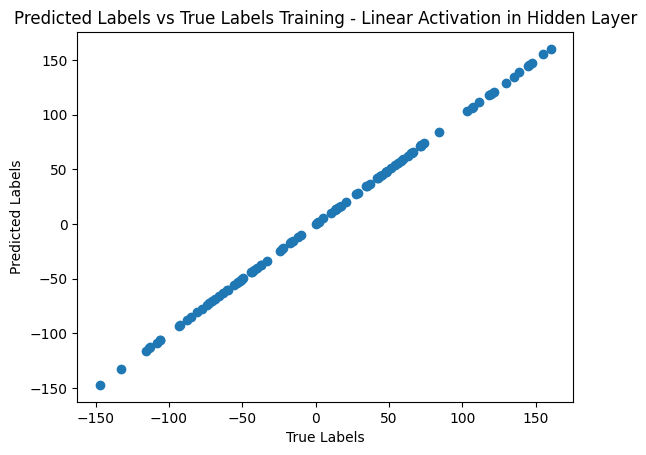

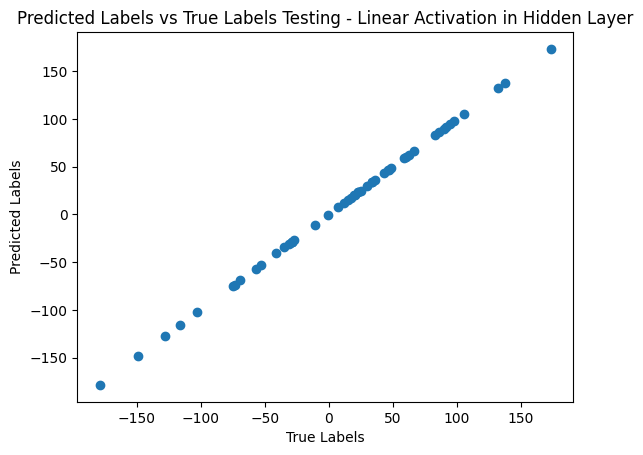

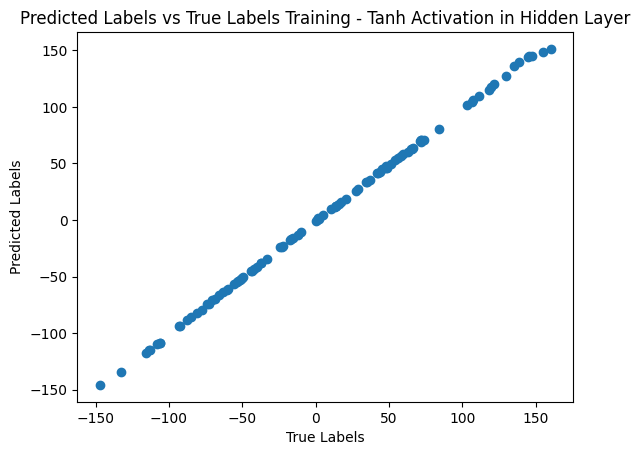

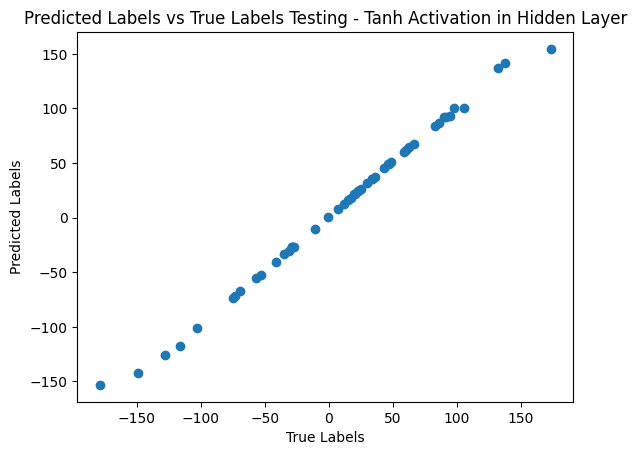

In [20]:
# Effect of different activation functions in the hidden layer

# Epochs set to 1000, learning rate set to .005, and hidden layers set to 10

# Linear Activation
MLP_linear = MLP_One_Hidden_Layer(nodes_hidden_layer=10, activation_function="linear", data_matrix=training_data_matrix, learning_rate=.005)
MLP_linear.MLP_training(1000)

# Plotting Predicted Labels vs True Labels for Training
plt.figure()
plt.title("Predicted Labels vs True Labels Training - Linear Activation in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_linear.data_matrix[:, -1], MLP_linear.a2_matrix)

# Print Loss for training
print("MSE loss for Linear Activation - Training")
print(MLP_linear.MSE())

# Modifying data matrix field in our MLP model to our new testing data matrix
# Modifying number of examples field in the model as well
MLP_linear.data_matrix = testing_data_matrix
MLP_linear.num_examples = np.shape(testing_data_matrix)[0]

# Run testing
MLP_linear.feed_forward()

# Plotting Predicted Labels vs True Labels for Testing
plt.figure()
plt.title("Predicted Labels vs True Labels Testing - Linear Activation in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_linear.data_matrix[:, -1], MLP_linear.a2_matrix)

# Print Loss for testing
print("MSE loss for Linear Activation - Testing")
print(MLP_linear.MSE())

# Tanh Activation
MLP_tanh = MLP_One_Hidden_Layer(nodes_hidden_layer=10, activation_function="tanh", data_matrix=training_data_matrix, learning_rate=.005)
MLP_tanh.MLP_training(1000)

# Plotting Predicted Labels vs True Labels for Training
plt.figure()
plt.title("Predicted Labels vs True Labels Training - Tanh Activation in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_tanh.data_matrix[:, -1], MLP_tanh.a2_matrix)

# Print Loss for training
print("MSE loss for Tanh Activation - Training")
print(MLP_tanh.MSE())

# Modifying data matrix field in our MLP model to our new testing data matrix
# Modifying number of examples field in the model as well
MLP_tanh.data_matrix = testing_data_matrix
MLP_tanh.num_examples = np.shape(testing_data_matrix)[0]

# Run testing
MLP_tanh.feed_forward()

# Plotting Predicted Labels vs True Labels for Testing
plt.figure()
plt.title("Predicted Labels vs True Labels Testing - Tanh Activation in Hidden Layer")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.scatter(MLP_tanh.data_matrix[:, -1], MLP_tanh.a2_matrix)

# Print Loss for testing
print("MSE loss for Tanh Activation - Testing")
print(MLP_tanh.MSE())


**Question 2**

7a. Yes I will need to change the update rule to properly update the w1 weights, which are the weights that connect the input and the hidden layer. I need two new update rules one that is for linear activation in the hidden layer and one for tanh activation in the hidden layer.

7b. The change I need to do to achieve this experiment is to create two new update rules for the linear and tanh activation functions. The update rules for models that are similar in all but the activation function in their sole hidden are almost the same except for the gradient da1/dz1. This gradient is the gradient of the activation function in the hidden layer with respect to the weighted inputs. For tanh its 1 - tanh(z1)^2 and for linear its 1. I need to make these changes when I calculate the loss with respect to my w1 weights during back propagation.

7c. When using the linear and tanh activation functions for my hidden layer, I am getting very good results. When plotting the predicted labels vs the true labels for testing and training, it is basically linear and smooth. However the linear activation function produced better results. My MSE for both training and testing for the linear activation is 1.03e-28 and 7.92e-29 respectively which is basically 0 for both losses. The tanh function produced better results than the sigmoid function producing a MSE for training and testing of 3.50 and 24.18 respectively.